<a href="https://colab.research.google.com/github/Deri-Nugroho/contoh-soal-pemrograman-on-site-Ekshibisi-AI/blob/main/Contoh_Soal_Pemrograman_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mesin Pencari

Mesin pencari seperti Google atau Bing menyimpan banyak dokumen Web. Seorang pengguna mesin pencari kemudian menuliskan sebuah query yang pada akhirnya akan dibandingkan dengan semua dokumen dan mengembalikan $K$ buah dokumen yang paling relevan berdasarkan metrik tertentu. Gambar berikut mengilustrasikan mesin pencari Google yang digunakan untuk mencari dokumen-dokumen dengan query "**bunga mawar**", dan kemudian menampilkan Top-3 dokumen Web yang paling relevan.

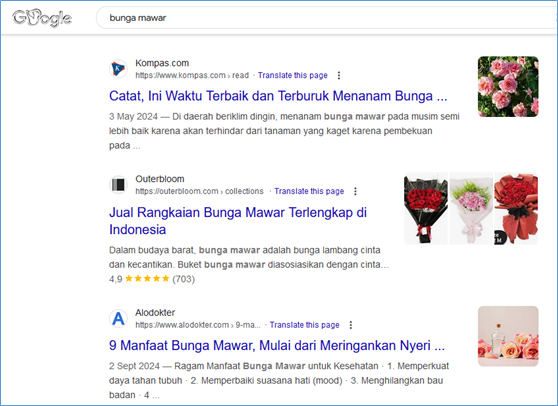

Salah satu representasi kumpulan dokumen pada mesin pencari adalah Term-Document matrix, dengan kolom berupa kumpulan dokumen, baris berupa kumpulan kata unik pada koleksi dokumen, dan setiap cell berupa frekuensi kemunculan kata pada dokumen tertentu. Sebagai contoh, jika sebuah koleksi mesin pencari terdiri dari lima dokumen berikut (urutan kata diabaikan):

	D1: kernel, bunga, bunga, kernel, memory
	D2: kernel, memory, memory
	D3: bunga, bunga, mawar, mawar
	D4: memory, memory, mawar, kernel
	D5: bunga, bunga, bunga

Kita dapat membangun Term-Document matrix sebagai berikut:

|  | $D_1$ | $D_2$ | $D_3$ | $D_4$ | $D_5$ |
|---|---|---|---|---|---|
| bunga | 2 | 0 | 2 | 0 | 3 |
| kernel | 2 | 1 | 0 | 1 | 0 |
| mawar | 0 | 0 | 2 | 1 | 0 |
| memory | 1 | 2 | 0 | 2 | 0 |

Masing-masing dokumen pada Term-Document matrix juga dapat dipandang sebagai sebuah vektor yang berada pada ruang vektor $R^n$ dengan masing-masing kata atau term menjadi basis-nya, yaitu n adalah banyaknya term atau kata unik pada koleksi. Sebagai contoh berikut adalah representasi vektor untuk $D_1$ dan $D_3$:

\begin{equation}
  \vec{D_1} = [2, 2, 0, 1]
\end{equation}

\begin{equation}
  \vec{D_3} = [2, 0, 2, 0]
\end{equation}

Misal, sebuah query yang digunakan oleh seorang pengguna mesin pencari dinotasikan sebagai vektor $\vec{Q}$ yang juga berada pada ruang vektor yang sama dengan dokumen-dokumen yang ada pada koleksi. Salah satu metrik yang sering digunakan untuk mengukur seberapa relevan sebuah dokumen $\vec{D}$ dengan query $\vec{Q}$ adalah **cosine similarity** yang menghitung besarnya nilai cosine dari sudut kedua vektor dan mengindikasikan seberapa dekat kedua vektor menunjuk ke arah yang sama. Perhatikan bahwa perhitungan cosine similarity melibatkan **dot product** dan juga perhitungan **L2-norm** dari vektor:

\begin{equation}
\text{sim}(\vec{Q},\vec{D}) = \frac{\vec{D}\cdot\vec{Q}}{||\vec{D}||||\vec{Q}||}
\end{equation}

Perhatikan bahwa **L2-norm** dari sebuah vektor $\vec{x}$ adalah $||\vec{x}||=\sqrt{\sum_{i}x_i^2}$.

Dalam hal ini, kita menganggap bahwa jika vektor $\vec{D}$ dan $\vec{Q}$ dekat secara makna (mempunyai topik pembicaraan yang sama atau relevan), maka sudut diantara keduanya juga kecil (nilai cosine sudut mendekati satu). Nilai cosine similarity ini yang menjadi acuan untuk melakukan **ranking** dokumen-dokumen pada koleksi terhadap sebuah query pengguna.

Sebagai contoh, misal, seorang pengguna mencari dokumen-dokumen menggunakan query $Q$ "**bunga mawar**". Pertama, query pengguna tersebut perlu diubah ke dalam bentuk vektor pada ruang vektor koleksi dokumen:

\begin{equation}
\vec{Q} = [1, 0, 1, 0]
\end{equation}

Kemudian, kita menghitung cosine similarity antara $\vec{Q}$ dengan semua dokumen pada koleksi $\vec{D_1}, \dots, \vec{D_n}$:

\begin{equation}
\text{sim}(\vec{Q}, \vec{D_1}) = 0{,}48 \\
\text{sim}(\vec{Q}, \vec{D_2}) = 0{,}00 \\
\text{sim}(\vec{Q}, \vec{D_3}) = 1{,}00 \\
\text{sim}(\vec{Q}, \vec{D_4}) = 0{,}30 \\
\text{sim}(\vec{Q}, \vec{D_5}) = 0{,}71 \\
\end{equation}

Anda bisa coba cross-check perhitungan di atas dengan persamaan cosine similarity yang sudah disampaikan sebelumnya.

Dari hasil di atas, jika diberikan query "**bunga mawar**", ranking dokumen yang dikembalikan oleh mesin pencari adalah:

1.  $D_3$, dengan skor 1,00
2.	$D_5$, dengan skor 0,71
3.	$D_1$, dengan skor 0,48
4.	$D_4$, dengan skor 0,30
5.	$D_2$, dengan skor 0,00


Tugas Anda adalah menyelesaikan permasalahan pemrograman (dengan Python) yang terkait dengan topik di atas. Kita representasikan koleksi dokumen dengan menggunakan Python’s Dictionary dengan key adalah ID dari dokumen dan value adalah isi tekstual dari dokumen tersebut:

In [ ]:
docs = {"D1": "kernel bunga bunga kernel memory",
        "D2": "kernel memory memory",
        "D3": "bunga bunga mawar mawar",
        "D4": "memory memory mawar kernel",
        "D5": "bunga bunga bunga"}


# Soal A

Definisikan fungsi `get_vocabs(docs)` yang menerima koleksi dokumen (Python's dictionary) sebagai parameter dan mengembalikan daftar kata unik (vocabulary) yang sudah **terurut secara alfabetis**.

In [ ]:

def get_vocabs(docs):
   pass # isikan kode disini


Anda dapat mencoba fungsi tersebut dengan potongan kode berikut, dan seharusnya mengembalikan `['bunga', 'kernel', 'mawar', 'memory']`

In [ ]:
get_vocabs(docs)

['bunga', 'kernel', 'mawar', 'memory']

# Soal B

Tugas berikutnya adalah mendefinisikan fungsi `cosine_sim(vec1, vec2)`. Gunakan fungsi `norm(vec)` untuk menghitung **L2-norm** dari sebuah vektor dan `dot_product(vec1, vec2)` untuk menghitung dot product dari dua buah vektor.

In [ ]:
# JANGAN DIMODIFIKASI

import math

def dot_product(vect1, vect2):
    sum_prod = 0.
    for i in range(len(vect1)):
        sum_prod += vect1[i] * vect2[i]
    return sum_prod

def norm(vect):
    sum_ = 0.
    for e in vect:
        sum_ += e * e
    return math.sqrt(sum_)


In [ ]:
# SOLUSI : Nanti, perlu ditutup, hanya header fungsi saja.

def cosine_sim(vect1, vect2):
    pass # isikan kode disini


Anda dapat mencoba fungsi yang sudah Anda implementasikan dengan potongan program berikut. Program seharusnya mencetak `0.5669467095138409`

In [ ]:
vec1 = [1, 1, 3, 1]
vec2 = [2, 0, 1, 4]
cosine_sim(vec1, vec2)

0.5669467095138409

# Soal C

Berikutnya, Anda perlu mendefinisikan fungsi `vector(text, vocabs)` yang menerima input sebuah teks (string) dan vocabulary (list of strings). Fungsi kemudian mengembalikan representasi vektor dari teks tersebut dengan kata-kata pada vocabulary menjadi basis-basis-nya.

In [ ]:
def vector(text, vocabs):
   pass # isikan kode disini

Berikut adalah contoh penggunaan dari fungsi `vector(text, vocabs)` tersebut.

In [ ]:
vocabs = get_vocabs(docs)

# EXPECTED OUTPUT: [2, 0, 1, 0]
vector("bunga bunga mawar", vocabs)

[2, 0, 1, 0]

In [ ]:
# EXPECTED OUTPUT: [3, 2, 2, 1]
vector("bunga mawar bunga kernel kernel mawar bunga memory", vocabs)

[3, 2, 2, 1]

# Soal D

Terakhir, Anda perlu mendefinisikan fungsi `search(query, vocabs, docs)` yang menerima tiga buah argument, yaitu (1) query yang berupa teks (string), (2) daftar vocabulary, dan (3) koleksi dokumen. Fungsi ini kemudian mengembalikan list of tuples, dengan sebuah tuple berupa (ID dokumen, skor cosine similarity). Perhatikan bahwa list of tuples perlu terurut secara mengecil berdasarkan nilai cosine similarity-nya.

In [ ]:
def search(query, vocabs, docs):
  pass # isikan kode disini


Contoh uji coba fungsi `search(query, vocabs, docs)`:

In [ ]:
# EXPECTED OUTPUT:
# D3 0.9999999999999998
# D5 0.7071067811865475
# D1 0.4714045207910316
# D4 0.2886751345948129
# D2 0.0

vocabs = get_vocabs(docs)
results = search("bunga mawar", vocabs, docs)

for doc_id, skor in results:
  print(doc_id, skor)

D3 0.9999999999999998
D5 0.7071067811865475
D1 0.4714045207910316
D4 0.2886751345948129
D2 0.0
